In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [52]:
diabetes_dataset = pd.read_csv(r'C:\Users\hp\Desktop\Major_project\ChronicDiseasePrediction\diabetes_disease\diabetes_dataset.csv')

In [53]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
diabetes_dataset.shape

(768, 9)

In [55]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
diabetes_dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df_class_0 = diabetes_dataset[diabetes_dataset['Outcome'] == 0]
df_class_1 = diabetes_dataset[diabetes_dataset['Outcome'] == 1]

In [ ]:
# populating class1
df_class_1_over = df_class_1.sample(500, replace=True)
diabetes_dataset = pd.concat([df_class_0, df_class_1_over], axis=0)

In [58]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [59]:
dataset = diabetes_dataset

In [60]:
medianGlucose = diabetes_dataset["Glucose"].median()
medianSkinThickness = diabetes_dataset["SkinThickness"].median()

In [61]:
diabetes_dataset["Glucose"].replace(np.nan,medianGlucose,inplace=True)
diabetes_dataset["SkinThickness"].replace(np.nan,medianSkinThickness,inplace=True)

In [62]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [63]:
duplicateValues = diabetes_dataset.duplicated()
print(duplicateValues)
print(duplicateValues.sum())
diabetes_dataset[duplicateValues]

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool
0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<AxesSubplot:>

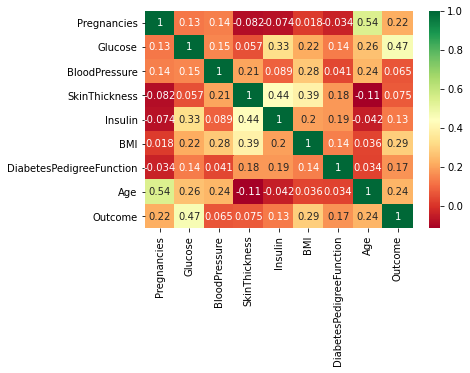

In [64]:
sns.heatmap(diabetes_dataset.corr(),annot=True,cmap="RdYlGn")

<function matplotlib.pyplot.show(close=None, block=None)>

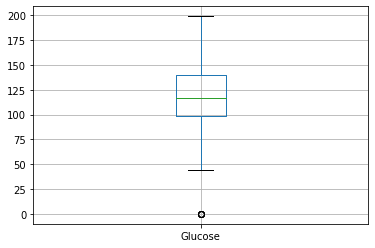

In [65]:
diabetes_dataset.boxplot(column=["Glucose"])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

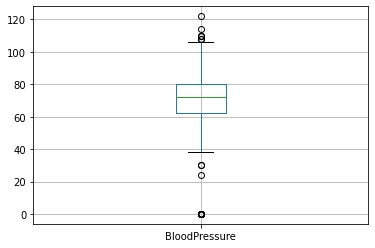

In [66]:
diabetes_dataset.boxplot(column=["BloodPressure"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

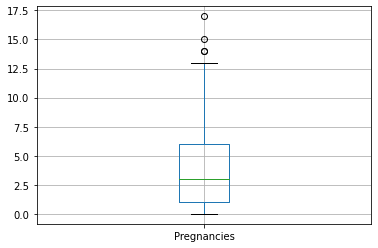

In [67]:
diabetes_dataset.boxplot(column=["Pregnancies"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

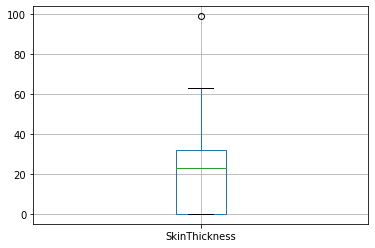

In [68]:
diabetes_dataset.boxplot(column=["SkinThickness"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

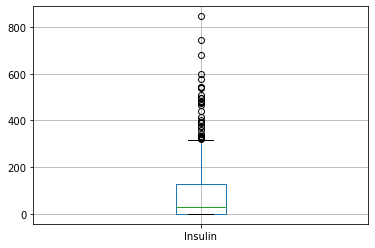

In [69]:
diabetes_dataset.boxplot(column=["Insulin"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

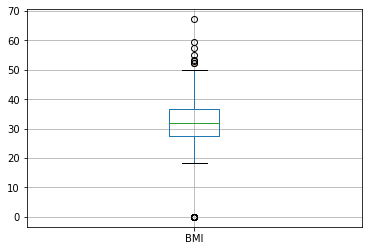

In [70]:
diabetes_dataset.boxplot(column=["BMI"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

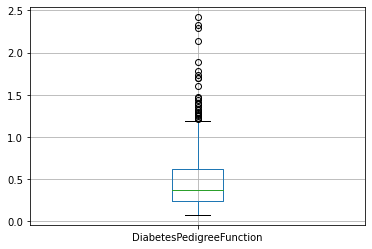

In [71]:
diabetes_dataset.boxplot(column=["DiabetesPedigreeFunction"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

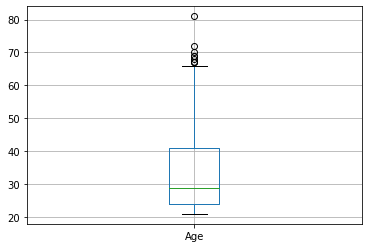

In [72]:
diabetes_dataset.boxplot(column=["Age"])
plt.show

In [73]:
def removeOutlier(col):
    sorted(col)
    q1,q3 = col.quantile([0.25,0.75])
    IQR = q3-q1
    lowerLimit = q1-(1.5*IQR)
    upperLimit = q3+(1.5*IQR)
    return lowerLimit,upperLimit


In [74]:
lowBp,highBp = removeOutlier(diabetes_dataset["BloodPressure"])
diabetes_dataset["BloodPressure"] = np.where(diabetes_dataset["BloodPressure"]>highBp,highBp,diabetes_dataset["BloodPressure"])
diabetes_dataset["BloodPressure"] = np.where(diabetes_dataset["BloodPressure"]<lowBp,lowBp,diabetes_dataset["BloodPressure"])

<function matplotlib.pyplot.show(close=None, block=None)>

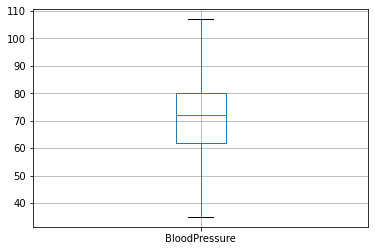

In [75]:
diabetes_dataset.boxplot(column=["BloodPressure"])
plt.show

In [76]:
lowInsulin,highInsulin = removeOutlier(diabetes_dataset["Insulin"])
diabetes_dataset["Insulin"] = np.where(diabetes_dataset["Insulin"]>highInsulin,highInsulin,diabetes_dataset["Insulin"])
diabetes_dataset["Insulin"] = np.where(diabetes_dataset["Insulin"]<lowInsulin,lowInsulin,diabetes_dataset["Insulin"])

<function matplotlib.pyplot.show(close=None, block=None)>

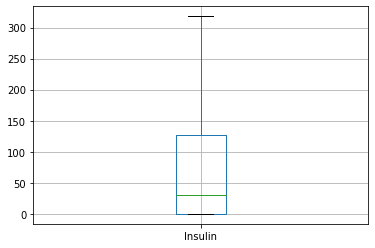

In [77]:
diabetes_dataset.boxplot(column=["Insulin"])
plt.show

In [78]:
lowBMI,highBMI = removeOutlier(diabetes_dataset["BMI"])
diabetes_dataset["BMI"] = np.where(diabetes_dataset["BMI"]>highBMI,highBMI,diabetes_dataset["BMI"])
diabetes_dataset["BMI"] = np.where(diabetes_dataset["BMI"]<lowBMI,lowBMI,diabetes_dataset["BMI"])

<function matplotlib.pyplot.show(close=None, block=None)>

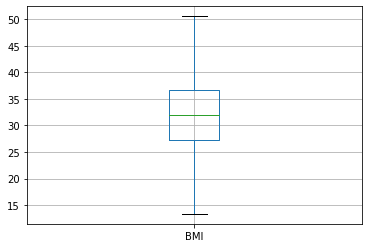

In [79]:
diabetes_dataset.boxplot(column=["BMI"])
plt.show

In [80]:
lowPregnancies,highPregnancies = removeOutlier(diabetes_dataset["Pregnancies"])
diabetes_dataset["Pregnancies"] = np.where(diabetes_dataset["Pregnancies"]>highPregnancies,highPregnancies,diabetes_dataset["Pregnancies"])
diabetes_dataset["Pregnancies"] = np.where(diabetes_dataset["Pregnancies"]<lowPregnancies,lowPregnancies,diabetes_dataset["Pregnancies"])

<function matplotlib.pyplot.show(close=None, block=None)>

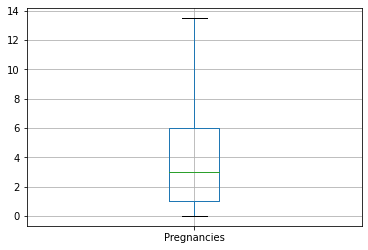

In [81]:
diabetes_dataset.boxplot(column=["Pregnancies"])
plt.show

In [82]:
lowGlucose,highGlucose = removeOutlier(diabetes_dataset["Glucose"])
diabetes_dataset["Glucose"] = np.where(diabetes_dataset["Glucose"]>highGlucose,highGlucose,diabetes_dataset["Glucose"])
diabetes_dataset["Glucose"] = np.where(diabetes_dataset["Insulin"]<lowGlucose,lowGlucose,diabetes_dataset["Glucose"])

<function matplotlib.pyplot.show(close=None, block=None)>

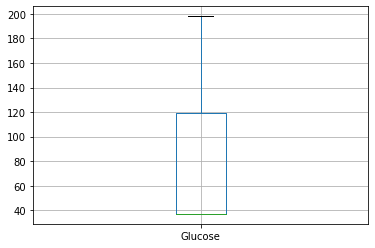

In [83]:
diabetes_dataset.boxplot(column=["Glucose"])
plt.show

In [84]:
lowSkinThickness,highSkinThickness = removeOutlier(diabetes_dataset["SkinThickness"])
diabetes_dataset["SkinThickness"] = np.where(diabetes_dataset["SkinThickness"]>highSkinThickness,highSkinThickness,diabetes_dataset["SkinThickness"])
diabetes_dataset["SkinThickness"] = np.where(diabetes_dataset["SkinThickness"]<lowSkinThickness,lowSkinThickness,diabetes_dataset["SkinThickness"])

<function matplotlib.pyplot.show(close=None, block=None)>

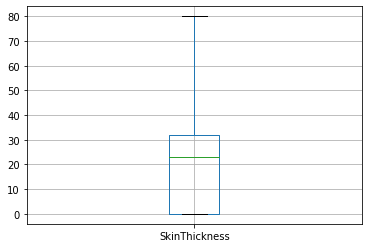

In [85]:
diabetes_dataset.boxplot(column=["SkinThickness"])
plt.show

In [86]:
lowDiabetesPedigreeFunction ,highDiabetesPedigreeFunction  = removeOutlier(diabetes_dataset["DiabetesPedigreeFunction"])
diabetes_dataset["DiabetesPedigreeFunction"] = np.where(diabetes_dataset["DiabetesPedigreeFunction"]>highDiabetesPedigreeFunction,highDiabetesPedigreeFunction,diabetes_dataset["DiabetesPedigreeFunction"])
diabetes_dataset["DiabetesPedigreeFunction"] = np.where(diabetes_dataset["DiabetesPedigreeFunction"]<lowDiabetesPedigreeFunction,lowDiabetesPedigreeFunction,diabetes_dataset["DiabetesPedigreeFunction"])

<function matplotlib.pyplot.show(close=None, block=None)>

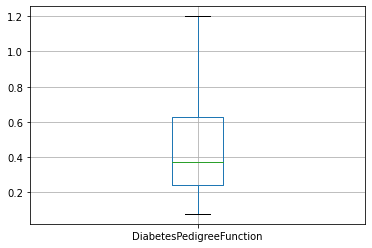

In [87]:
diabetes_dataset.boxplot(column=["DiabetesPedigreeFunction"])
plt.show

In [88]:
lowAge ,highAge  = removeOutlier(diabetes_dataset["Age"])
diabetes_dataset["Age"] = np.where(diabetes_dataset["Age"]>highAge,highAge,diabetes_dataset["Age"])
diabetes_dataset["Age"] = np.where(diabetes_dataset["Age"]<lowAge,lowAge,diabetes_dataset["Age"])

<function matplotlib.pyplot.show(close=None, block=None)>

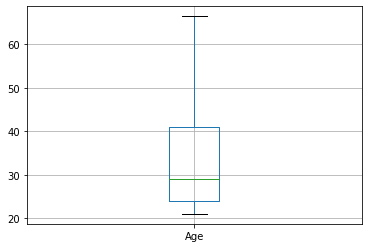

In [89]:
diabetes_dataset.boxplot(column=["Age"])
plt.show

In [90]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,37.125,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,37.125,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,37.125,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.000,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.000,40.0,35.0,168.0,43.1,1.200,33.0,1


In [91]:
stdScale = StandardScaler()
stdScale

StandardScaler()

In [92]:
sc_dataset = pd.DataFrame(stdScale.fit_transform(diabetes_dataset.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [93]:
sc_dataset.head()
sc_dataset['Outcome'] = diabetes_dataset['Outcome']

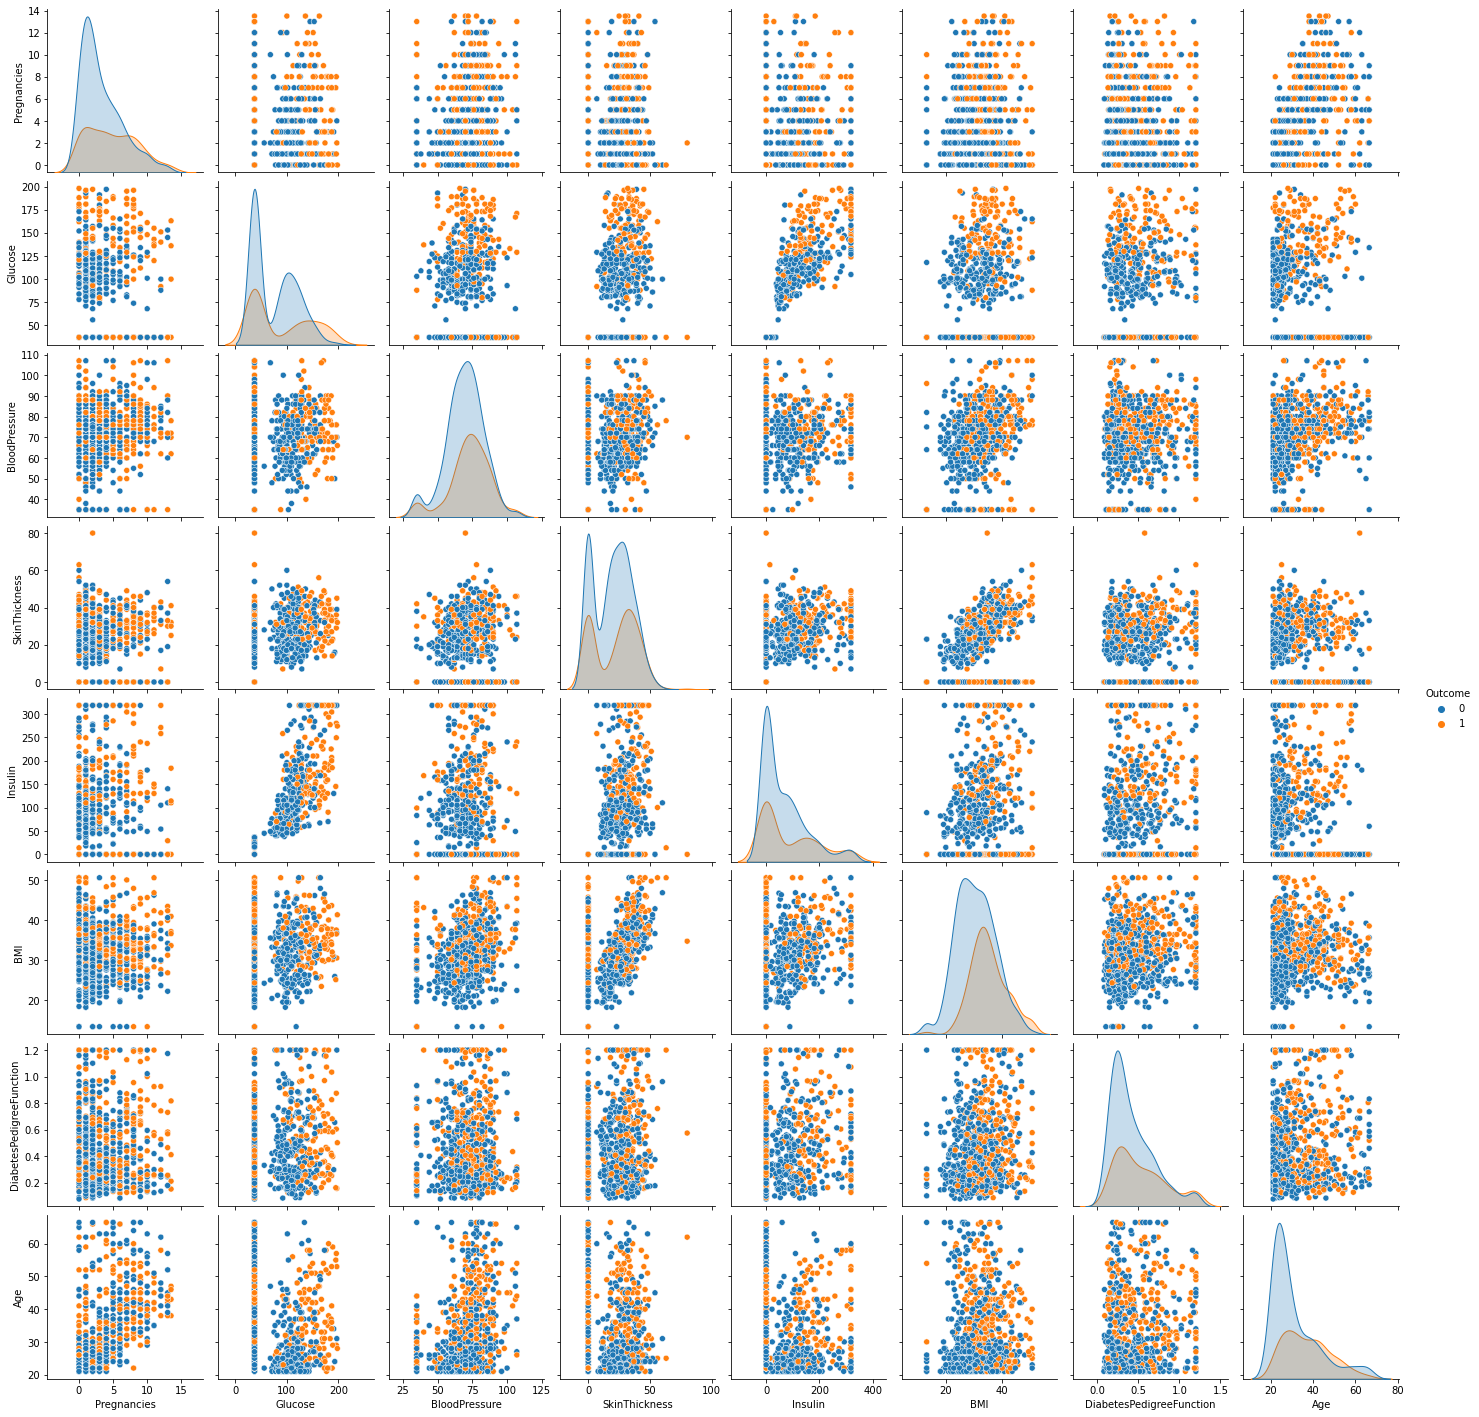

In [94]:
sns.pairplot(diabetes_dataset,hue="Outcome")
plt.show()

In [95]:
diabetes_dataset = dataset.drop(columns=["BloodPressure","SkinThickness","DiabetesPedigreeFunction"])

In [98]:
diabetes_dataset.head()

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,0.647150,-0.882230,-0.787602,0.209359,1.445691,1
1,-0.848970,-0.882230,-0.787602,-0.784254,-0.189304,0
2,1.245598,-0.882230,-0.787602,-1.252672,-0.103252,1
3,-0.848970,0.194057,0.217583,-0.571337,-1.049828,0
4,-1.148194,1.189948,1.008900,1.557835,-0.017199,1


In [99]:
diabetes_dataset.to_csv(r"C:\Users\hp\Desktop\Major_project\ChronicDiseasePrediction\diabetes_disease\test.csv",index=False)